# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("pima-data.csv");

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


## Check for null values

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
        
        0 -----------------------> 1 Expect a darkred line running from top left to bottom right.
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangles by correlation value.
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

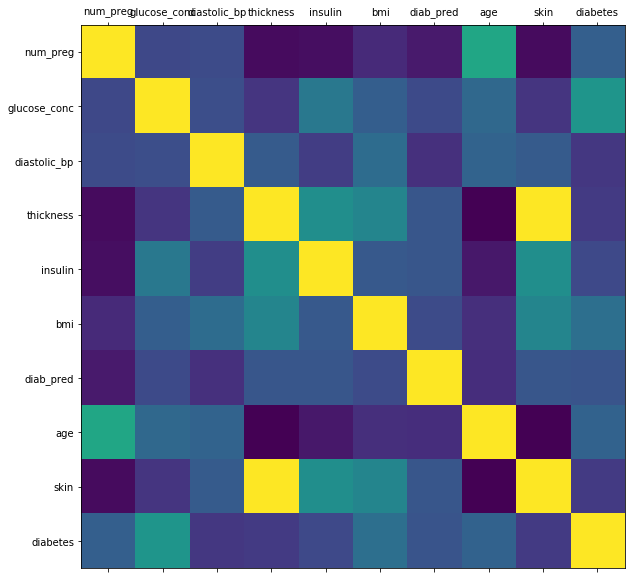

In [8]:
plot_corr(df)

In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## Remove correlated fields

In [10]:
del df['skin']

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


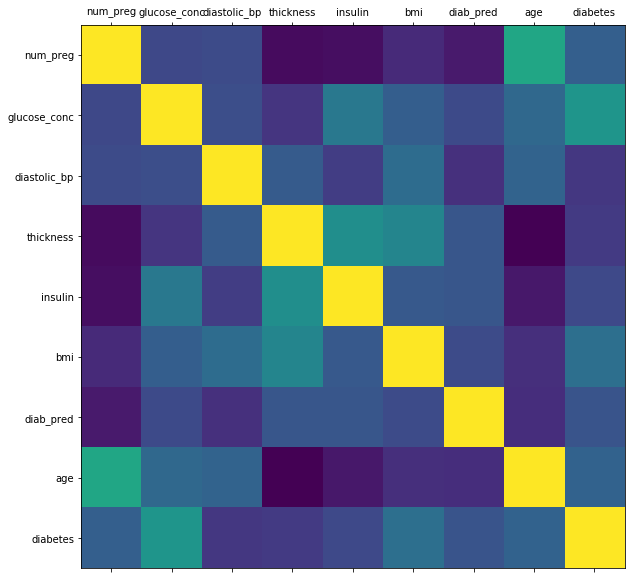

In [12]:
plot_corr(df)

df.head()

In [13]:
diabetes_map = {True : 1, False : 0}

In [14]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [16]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true+ num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true+ num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Splitting the Data

### 70% for training, 30% for testing

train_test_split

Splits the data into four Numpy arrays of data, Test and training feature columns and test and train of the diabetes results;
Minor and important feature: random state = 42; This sets the seed for the random number generator used as a part of the splitting process. Setting the seed to a constant ensures that the split will be indentical;

Any number can be used for the random states;

In [17]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values  # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predictor class (1 = true, 0 = false) column (1 x m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state = 42)

### We check to ensure we have the desired 70% train, 30% test split of the data.

In [18]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verfying predicted values was split correctly

In [19]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1]) / len(df.index)) * 100 ))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0]) / len(df.index)) * 100 ))
print(" ")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train)) * 100 ))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train)) * 100 ))
print(" ")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100 ))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100 ))

Original True : 268 (34.90%)
Original False : 500 (65.10%)
 
Training True : 188 (35.01%)
Training False : 349 (64.99%)
 
Test True : 80 (34.63%)
Test False : 151 (65.37%)


## Post-Split Data Preparation

### Hidden Missing Values

In [20]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###  Are these 0 values possible?

#### How many rows have unexpected 0 values?

In [21]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


### Impute with Mean

In [22]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm -Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with data;
# Classic bell-curve

nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performing on Training Data

In [24]:
# predict values using the train data
nb_predict_train = nb_model.predict(X_train)



In [25]:
from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



### Metrics

In [26]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_train, nb_predict_train, labels=[1,0])))
print(" ")
print("Confusion Matrix")
print("TP FP")
print("FN TN")
print(" ")
print("Classification Report")
print(metrics.classification_report(y_train, nb_predict_train, labels=[1,0]))
print("TP - true positive, actual diabetes and predicted diabetes.")
print("FN - false negative, actual diabetes, but predicted to be not diabetic.")
print("FP - false positive, actual not diabets, but predicted to be diabetic.")
print("TN - true negative, actual not diabetes, and predicted to be not diabetic.")
print(" ")
print("'Perfect' Classifier")
print("80   0")
print(" ")

Confusion Matrix
[[112  76]
 [ 56 293]]
 
Confusion Matrix
TP FP
FN TN
 
Classification Report
             precision    recall  f1-score   support

          1       0.67      0.60      0.63       188
          0       0.79      0.84      0.82       349

avg / total       0.75      0.75      0.75       537

TP - true positive, actual diabetes and predicted diabetes.
FN - false negative, actual diabetes, but predicted to be not diabetic.
FP - false positive, actual not diabets, but predicted to be diabetic.
TN - true negative, actual not diabetes, and predicted to be not diabetic.
 
'Perfect' Classifier
80   0
 


### Performance on  Testing Data

In [27]:
# predict values on Testing Data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

#testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

print(" ")
print("Recall - tp rate & sensitivity, how well the model is predicting diabetes when result is diabetes")
print("Recall = TP / (TP + FN); it is 0.65 but must be >= 70%")
print("Precision - Positive predictor value, this is how often the patient actually had diabted when the model said they would.")
print("Precision = TP / (TP + FP); it is 0.61 , value must be increased")

Accuracy: 0.7359
Confusion Matrix
[[ 52  28]
 [ 33 118]]
Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231

 
Recall - tp rate & sensitivity, how well the model is predicting diabetes when result is diabetes
Recall = TP / (TP + FN); it is 0.65 but must be >= 70%
Precision - Positive predictor value, this is how often the patient actually had diabted when the model said they would.
Precision = TP / (TP + FP); it is 0.61 , value must be increased


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict Training Data

In [29]:
rf_predict_train = rf_model.predict(X_train)
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print(metrics.confusion_matrix(y_train, rf_predict_train, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_train, rf_predict_train, labels=[1, 0]))

Accuracy: 0.9870
[[182   6]
 [  1 348]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.99      0.97      0.98       188
          0       0.98      1.00      0.99       349

avg / total       0.99      0.99      0.99       537



### Predict Test Data

In [30]:
rf_predict_test = rf_model.predict(X_test)

#testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Accuracy: 0.7100
[[ 43  37]
 [ 30 121]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



In [31]:
print("recall -> 54% (low) -> Accuracy with training data -> 98%; test data -> 71%; Cause the algorithm is overfitting the training data;")
print("That is the model has learned the training data too well.")

recall -> 54% (low) -> Accuracy with training data -> 98%; test data -> 71%; Cause the algorithm is overfitting the training data;
That is the model has learned the training data too well.


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42) # c - regularization parameter
lr_model.fit(X_train, y_train.ravel())
lr_predict_train = lr_model.predict(X_train)
lr_predict_test = lr_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print(metrics.confusion_matrix(y_train, lr_predict_train, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_train, lr_predict_train, labels=[1, 0]))
print(" ")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))

Accuracy: 0.7728
[[101  87]
 [ 35 314]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.74      0.54      0.62       188
          0       0.78      0.90      0.84       349

avg / total       0.77      0.77      0.76       537

 
Accuracy: 0.7446
[[ 44  36]
 [ 23 128]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



### Setting regularization Parameter

1st max value of 0.613 occured at C=1.400


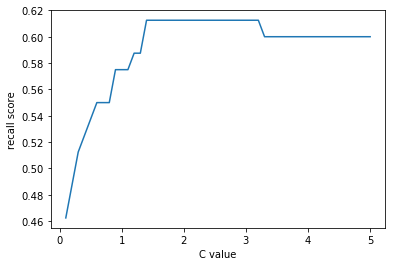

In [33]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

# Trying to achieve a recall of above 70% for the above case where it is 61.3%
# Unbalanced classes could be an issue - more non-diabetic patients than diabetic patients could be the issue.


### Logistics regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


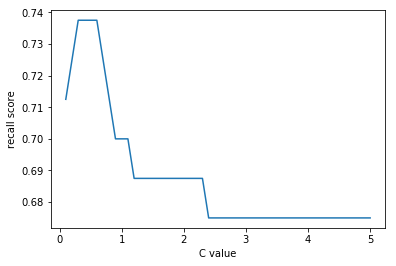

In [34]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
        
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[ 59  21]
 [ 45 106]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


### LogisticRegressionCV (LogisticRegression + K-fold CrossValidation)

In [36]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_train = lr_cv_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print(metrics.confusion_matrix(y_train, lr_cv_predict_train, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_train, lr_cv_predict_train))

Accuracy: 0.7691
[[139  49]
 [ 75 274]]
 
Classification Report
             precision    recall  f1-score   support

          0       0.85      0.79      0.82       349
          1       0.65      0.74      0.69       188

avg / total       0.78      0.77      0.77       537



### Predict on Test Data

In [37]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7013
[[ 53  27]
 [ 42 109]]
 
Classification Report
             precision    recall  f1-score   support

          0       0.80      0.72      0.76       151
          1       0.56      0.66      0.61        80

avg / total       0.72      0.70      0.71       231

